In [9]:
install.packages("leaps")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
library(tidyverse)
library(ISLR)
library(leaps)

In [7]:
#RIKZ data with Richness
survey_data=tibble(read.csv("data/RIKZ",sep="\t"))
richness=apply(survey_data[c(2:76)],1, function(i) sum(i>0))
survey_data=add_column(survey_data, richness) 
survey_data_richness= select(survey_data,-c(2:76))
survey_data_richness

Sample,week,angle1,angle2,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach,richness
1,1,32,96,10,29.4,17.500,0.045,253.9,222.5,0.0500,2.05,69.8300,1,11
2,1,62,96,10,29.4,17.500,-1.036,226.9,200.0,0.3000,2.50,59.0000,1,10
3,1,65,96,10,29.4,17.500,-1.336,237.1,194.5,0.1000,3.45,59.2200,1,13
4,1,55,96,10,29.4,17.500,0.616,248.6,221.0,0.1500,1.60,67.7500,1,11
5,1,23,96,10,29.4,17.500,-0.684,251.9,202.0,0.0500,2.45,57.7600,1,10
6,1,129,89,8,29.6,20.800,1.190,250.1,192.5,0.1000,2.50,53.0750,2,8
7,1,126,89,8,29.6,20.800,0.820,257.1,205.5,0.1000,1.85,54.4100,2,9
8,1,52,89,8,29.6,20.800,0.635,247.9,211.5,0.1000,1.70,60.4050,2,8
9,1,26,89,8,29.6,20.800,0.061,248.9,205.5,0.1500,2.30,58.8100,2,19
10,1,143,89,8,29.6,20.800,-1.334,257.9,197.0,0.0000,2.60,59.5750,2,17


In [16]:
regfit.full <- regsubsets(richness ~ ., survey_data_richness, nvmax=14)
summary(regfit.full)
reg.summary=summary(regfit.full)

Subset selection object
Call: regsubsets.formula(richness ~ ., survey_data_richness, nvmax = 14)
14 Variables  (and intercept)
              Forced in Forced out
Sample            FALSE      FALSE
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 14
Selection Algorithm: exhaustive
          Sample week angle1 angle2 exposure salinity temperature NAP
1  ( 1 )  " "    " "  " "    " "    "*"      " "      " "         " "
2  ( 1 )  " "    " "  " "    " "    "*"      " "      " "         "*"
3  ( 1 )  " "    " "  " "    " "    "*"      "*"      " "         "*"
4  (

In [17]:
reg.summary$rsq

[1] 0.3396289 0.6321333 0.6792648 0.6875366 0.6906853 0.7058563 0.7113610
 [8] 0.7172510 0.7242061 0.7245275 0.7246773 0.7247621 0.7247739 0.7247818

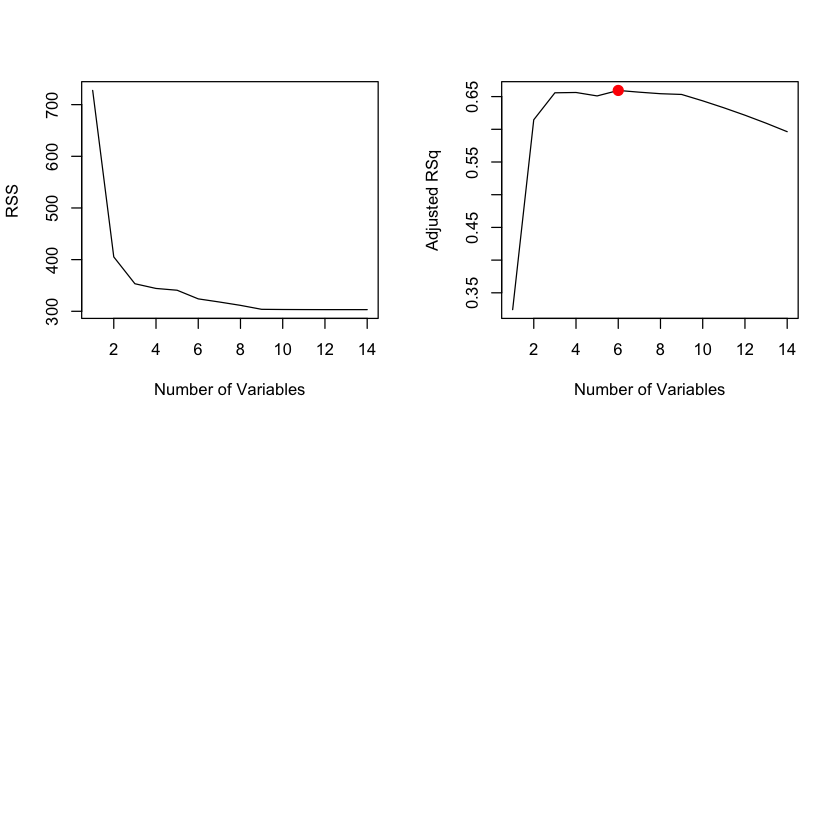

In [18]:
par(mfrow = c(2, 2))
plot(reg.summary$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")

adjr2.max <- which.max(reg.summary$adjr2)
points(adjr2.max, reg.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

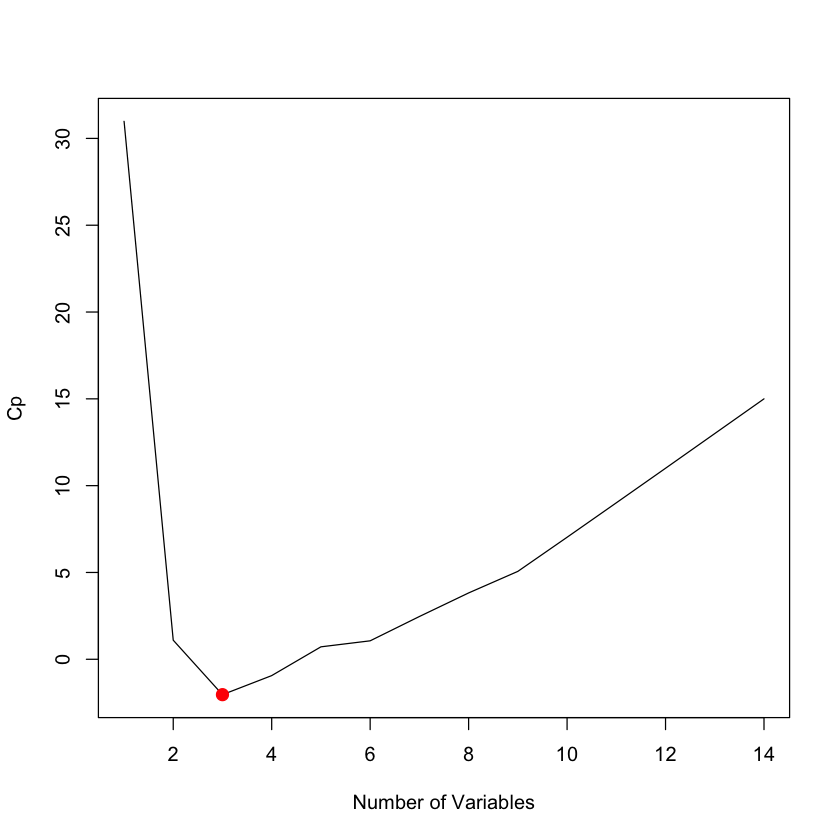

In [19]:
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
cp.min <- which.min(reg.summary$cp)
points(cp.min, reg.summary$cp[cp.min], col = "red", cex = 2, pch = 20)

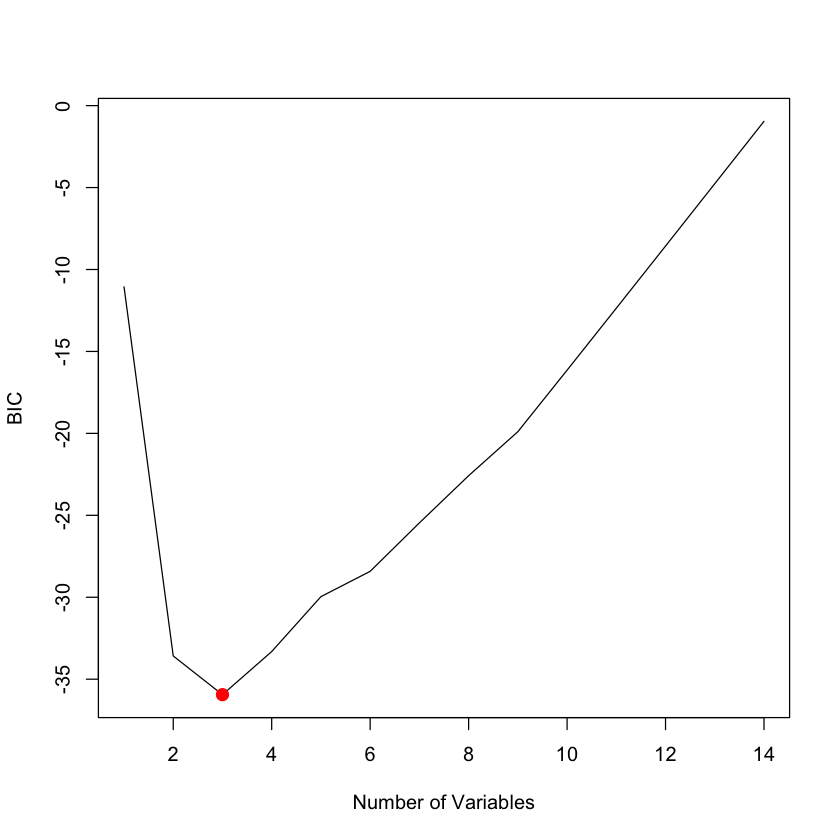

In [20]:
bic.min <- which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(bic.min, reg.summary$bic[bic.min], col = "red", cex = 2, pch = 20)

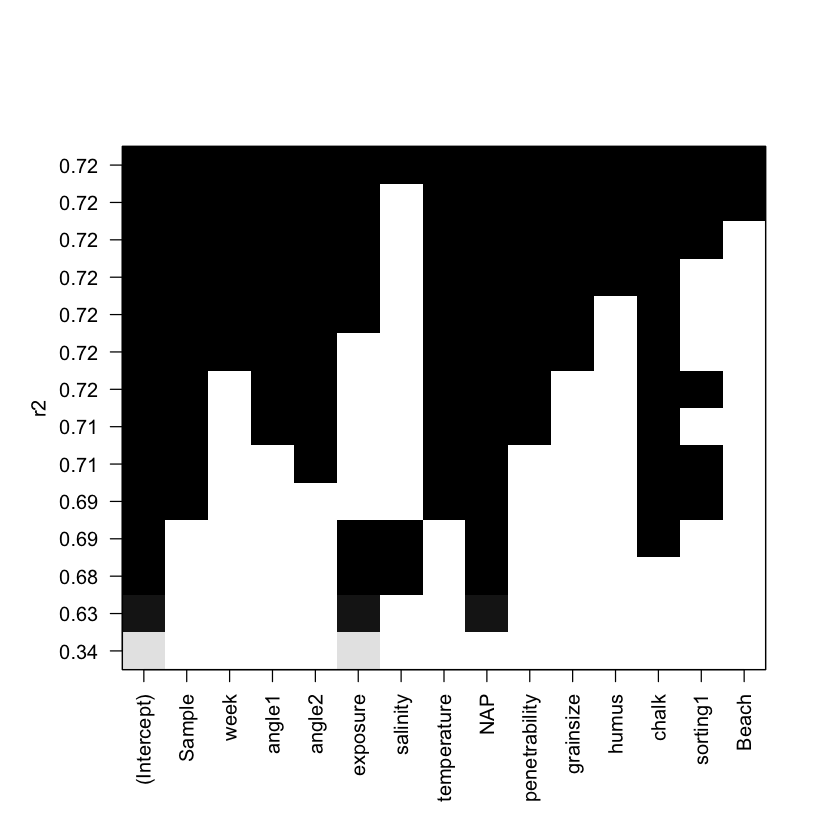

In [21]:
plot(regfit.full, scale = "r2")

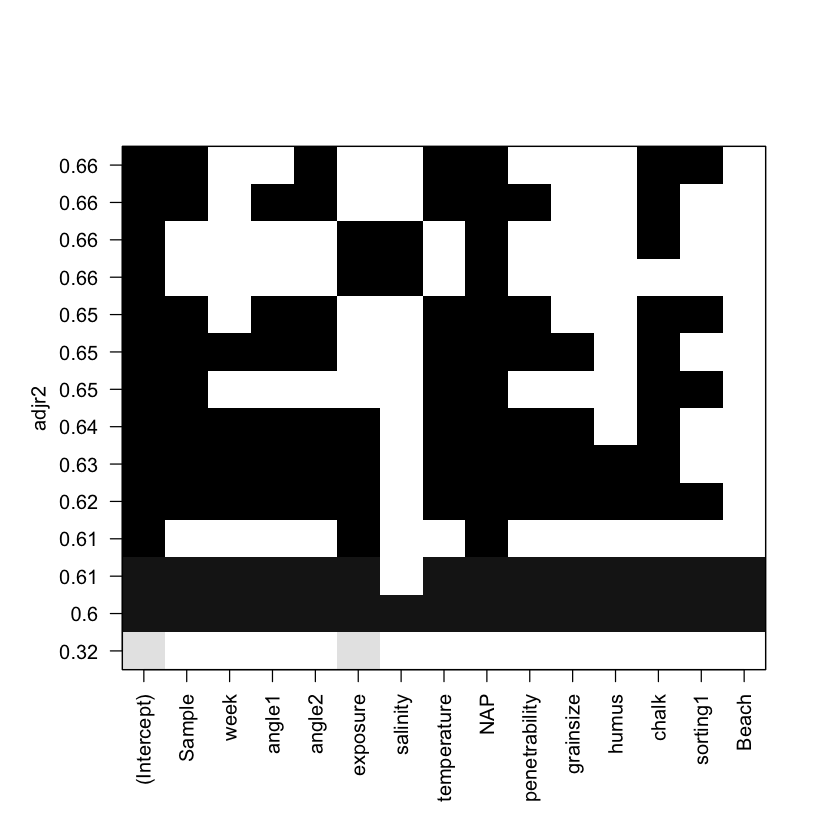

In [22]:
plot(regfit.full, scale = "adjr2")

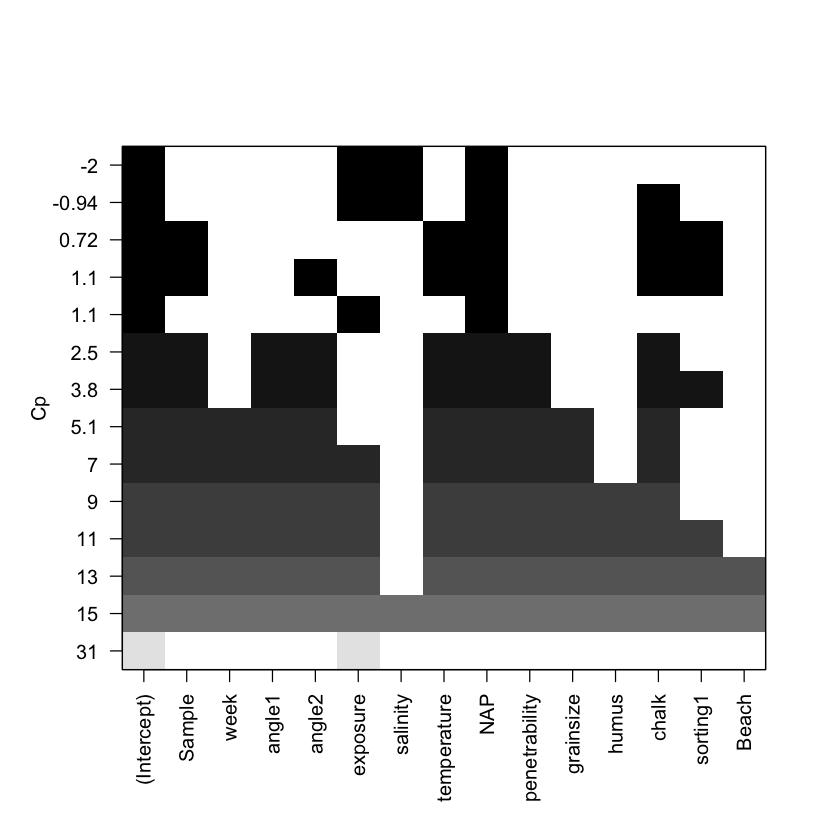

In [23]:
plot(regfit.full, scale = "Cp")

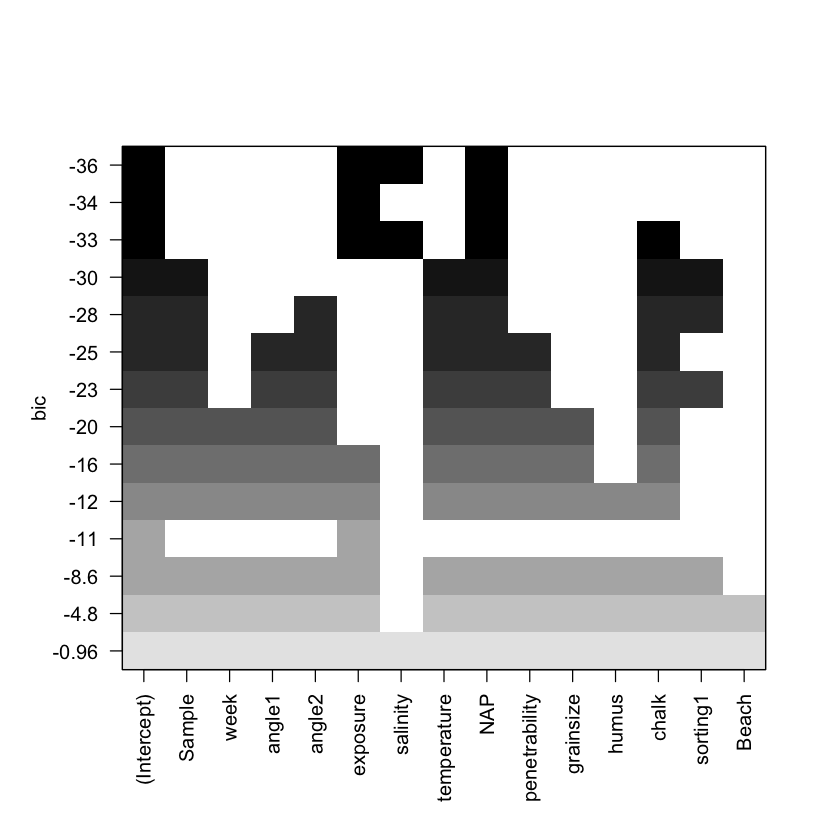

In [24]:
plot(regfit.full, scale = "bic")

In [25]:
coef(regfit.full, bic.min)

(Intercept)    exposure    salinity         NAP 
   0.574551   -2.320101    1.058035   -2.588074

# By plot
Best expanation of varaince is exposure, salinity, and NAP

In [43]:
#Cross Validation
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(survey_data_richness), rep = TRUE)
tests <- (!train)

In [44]:
regfit.best <- regsubsets(richness ~ ., data=survey_data_richness[train, ], nvmax=14)

In [46]:
test.mat <- model.matrix(richness ~ ., data=survey_data_richness[tests, ])

In [47]:
val.errors <- rep(NA, 14)
for (i in 1:14) {
    coefi <- coef(regfit.best, id = i)
    pred <- test.mat[, names(coefi)] %*% coefi
    val.errors[i] <- mean((survey_data_richness$richness[test] - pred)^2)
}

In [48]:
val.errors

[1] 18.857606 11.263173  5.908526 16.222727 15.203819 12.238642 25.373827
 [8] 26.025633 25.230154 25.702402 29.249665 28.360178 27.363277 27.664737

In [49]:
min.val.errors <- which.min(val.errors)
coef(regfit.best, min.val.errors)

(Intercept)    exposure    salinity         NAP 
 -16.711996   -1.510040    1.366298   -2.635254

In [50]:
predict.regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id = id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}

In [51]:
regfit.best <- regsubsets(richness ~ ., data = survey_data_richness, nvmax = 14)
coef(regfit.best, min.val.errors)

(Intercept)    exposure    salinity         NAP 
   0.574551   -2.320101    1.058035   -2.588074

In [52]:
k <- 10
set.seed(1)
folds <- sample(1:k, nrow(survey_data_richness), replace = TRUE)
cv.errors <- matrix(NA, k, 14, dimnames = list(NULL, paste(1:14)))

In [53]:
for (j in 1:k) {
    best.fit <- regsubsets(richness ~ ., data = survey_data_richness[folds != j, ], nvmax = 14)
    for (i in 1:14) {
        pred <- predict(best.fit, survey_data_richness[folds == j, ], id = i)
        cv.errors[j, i] <- mean((survey_data_richness$richness[folds == j] - pred)^2)
    }
}

In [54]:
mean.cv.errors <- apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
28.50687 10.99863 11.20642 13.56458 14.42202 14.77771 14.42200 14.79765 
       9       10       11       12       13       14 
14.97321 15.19412 15.40594 15.80441 15.93675 15.97080

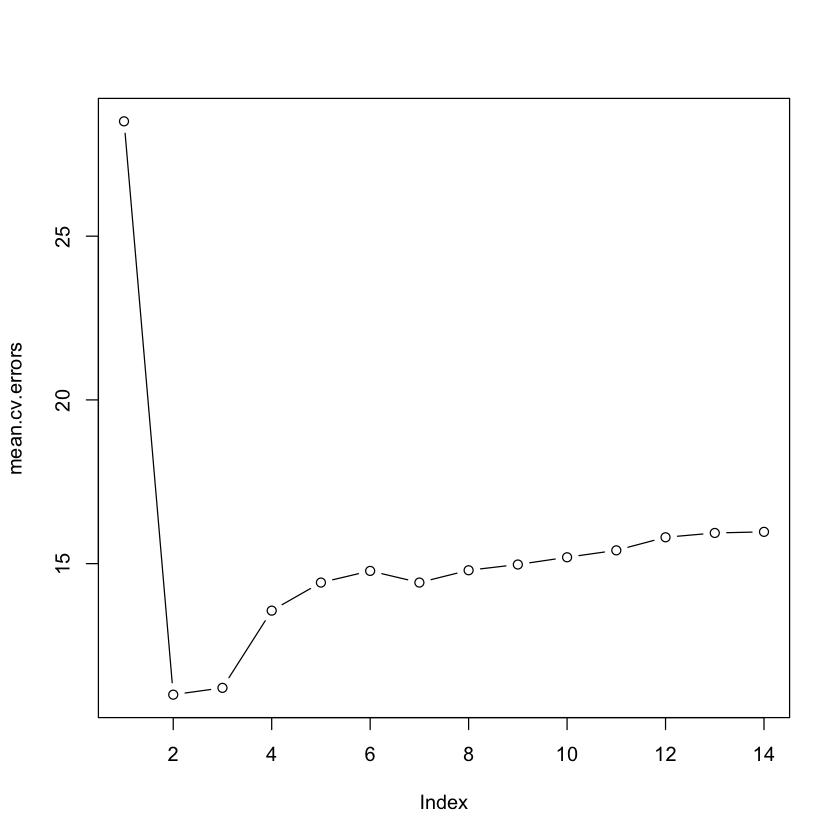

In [55]:
par(mfrow = c(1, 1))
plot(mean.cv.errors, type = "b")

In [56]:
reg.best <- regsubsets(richness ~ ., data = survey_data_richness, nvmax = 14)
coef(reg.best, which.min(mean.cv.errors))

(Intercept)    exposure         NAP 
  37.290896   -2.998809   -2.725181

# Cross Validation Results: Exposure and NAP

By Cross Validation, best explanation of variation is exposure and NAP 

In contrast to by plot where salinity, exposure, and NAP best explained variance